# Going Deeper 3. Data Augmentation
## Image Augmentation - Flip

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

이미지를 불러와 500*400 사이즈로 resize 한다.

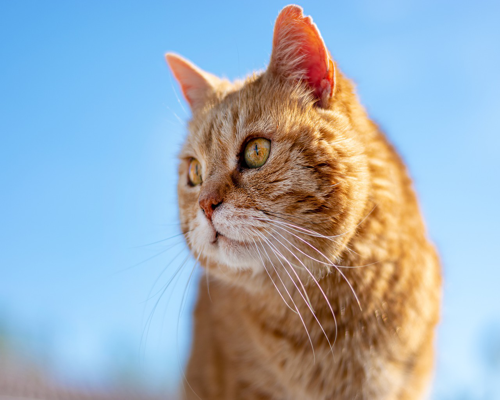

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

Flip 을 적용한다. Flip은 `flip_left_right`와 `flip_up_down` 두 가지로 좌우와 상하 반전으로 구분된다.

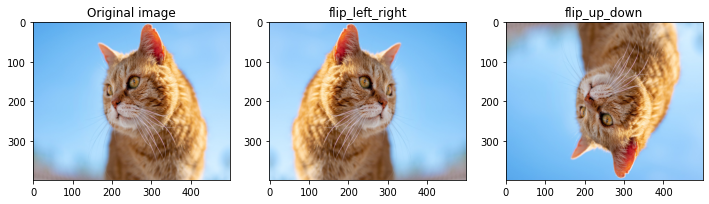

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

반전이 되지 않은 원본 데이터도 활용하기 위해 확률에 따라서 flip 이 적용되게 해야한다. 이를 위해 `random_flip_left_right` 와 `random_flip_up_down` 을 사용한다.

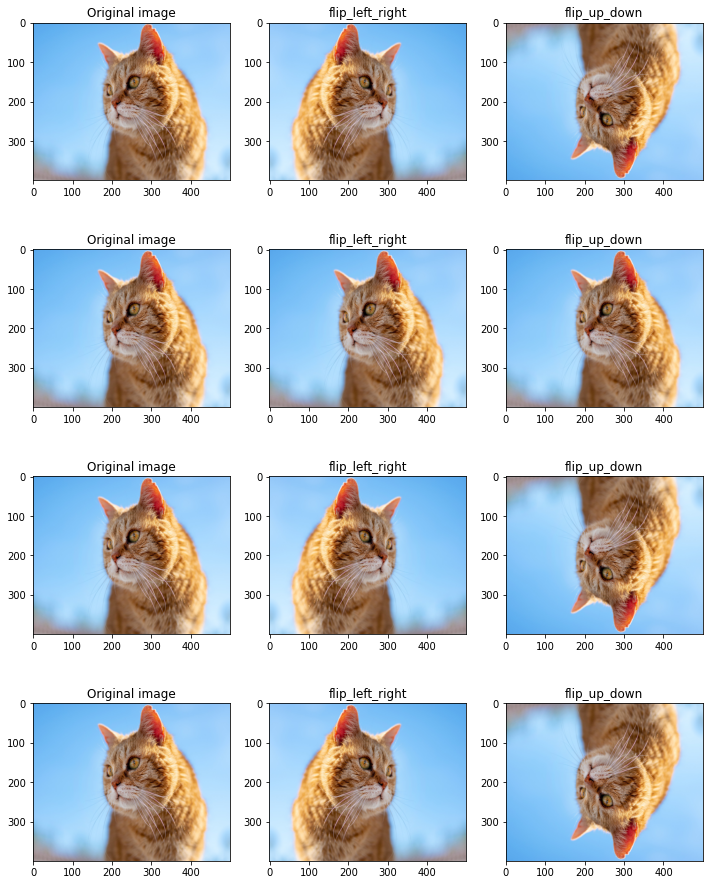

In [4]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)


## Image Augmentation - Center Crop
Center crop은 중앙을 기준으로 자른 이미지를 사용하는 augmentation 기법이다.  

중심점을 기준으로 사진을 확대할 때 `central_fraction` 이라는 얼마나 확대를 할지 조절하는 매개변수를 주의해서 사용해야한다.  

예를 들어 `central_fraction` 이 0.25 수준까지 내려가면 고양이의 형상이 아닌 털만 보일 수 있다.  

따라서 `central_fraction` 의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야한다.

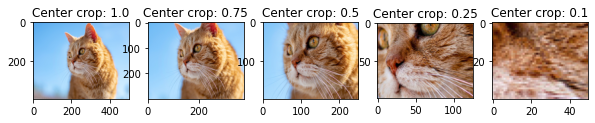

In [10]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤하게 `central_crop` 을 적용하는 함수를 만들어보자.

In [11]:
def random_central_crop(image_tensor, range=(0, 1)): 
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

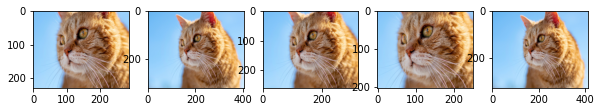

In [12]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor, range=(0.5,1)) # 알맞은 범위의 central fraction 파라미터 설정
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## Image Augmentation - Random Crop

In [18]:
plt.figure(figsize=(8, 12))

random_crop_tensor = tf.image.random_crop(image_tensor,[250,250,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

In [17]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[250,250,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

## Image Augmentation - Brightness

`tf.image.random_brightness()`만을 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있다. 이 경우 `plt.imshow()`에서 rescale되어 밝기 변경 효과가 상쇄되어 보일 수도 있다. 따라서 `tf.image.random_brightness()` 다음에는 `tf.clip_by_value()`를 적용해야한다.

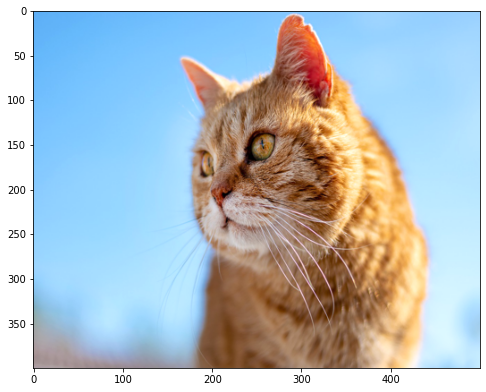

In [19]:
# apply random_brightness on cat image
plt.figure(figsize=(8, 12))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

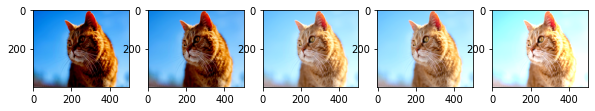

In [20]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

----
## imgaug 라이브러리 사용

Image augmentation 함수를 제공하는 전문 라이브러리 중 [imgaug](https://github.com/aleju/imgaug) 를 활용해보자.   

![image](https://user-images.githubusercontent.com/84179578/135705111-bd3a7136-1fbc-48a8-b32d-95abc422caeb.png)  
출처 : imgaug Github  

이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용이 되어야한다. 

위 표에서 Image 컬럼은 각 원본 이미지들이고 Heatmaps, Seg. Maps(Segmentation Maps), Keypoints, Bouding Boxes, Polygons 컬럼은 해당 원본 데이터에 대해 각 이미지 태스크에 따른 정답 데이터이다.  
표에서 볼 수 있듯이, 정답 데이터는 원본 데이터의 augmentation에 따라 같이 변화되어야한다. 이미지가 반전이 되었는데 정답으로 활용되는 정답 데이터가 반전이 되지 않은 bounding box라면 틀린 정답을 모델이 학습하게 되고 이는 성능에 악영향을 줄 수 있다.

`imgaug` 에서는 배열을 이미지의 기본 형태로 사용한다. 따라서 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하겠다.

In [21]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

## augmentation 기법
### `iaa.Affine()`

`imgaug.augmenters` 의 `Affine()` 은 아핀 변환(Affine transform)을 이미지에 적용한다.  
2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있다. 

-25도와 25도 사이에 랜덤하게 각도를 변환하는 augmentation 을 적용해보자.

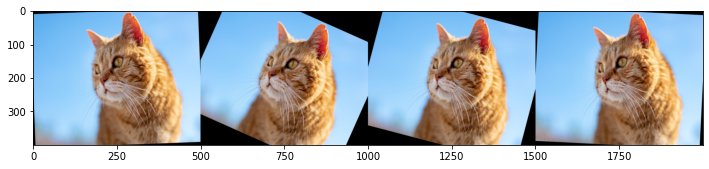

In [22]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### `iaa.Crop()`
Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지를 생성한다.

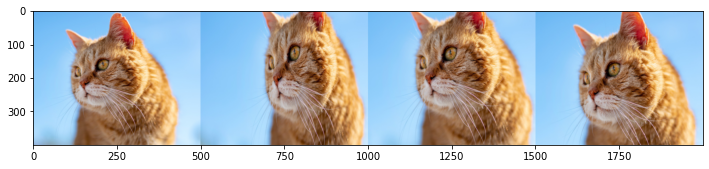

In [23]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### `iaa.Sequential()`
`imgaug`에서는 `iaa.Sequential`를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있다.  

아래 코드에서는 위에서 사용한 rotate와 crop이 적용된 결과를 볼 수 있다.

In [24]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

위처럼 `iaa.Seqential()` 의 augmentation 순서는 고정이 된다.

random으로 기법들의 순서를 바꾸어 사용할 수 있도록 지원하고 있다.

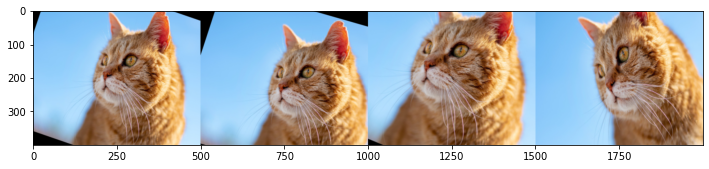

In [26]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### `iaa.OneOf()`

`iaa.OneOf()`를 사용하면 여러 augmentation 기법들 중 하나를 선택하도록 할 수 있다.  

예를 들어 색상에 변화를 줄 때 여러 변환이 불필요한 경우 선택지 중 하나의 기법만 적용되도록 할 수 있다.   

아래에서는 gray scale로 변환하거나 saturation을 변화하는 augmentation 둘 중 하나가 적용되는 함수를 볼 수 있다.



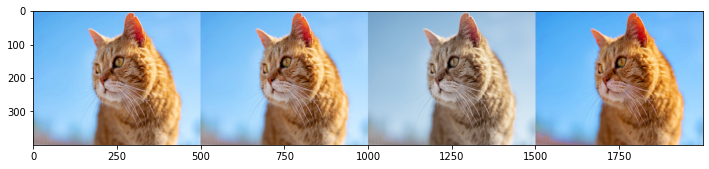

In [27]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

`imgaug`는 augmentation들이 일정 확률로 선택이 되게 하는 기능을 제공한다. 이 기능을 사용하는 `iaa.Sometimes()`는 위의 `iaa.OneOf()`처럼 사용할 수 있다.  

이를 활용해서 `iaa.AddToSaturation()`을 0.6의 확률로, `iaa.Grayscale()`를 0.2의 확률로 적용하는 augmentation 함수를 구현하고 결과를 시각화해보자.

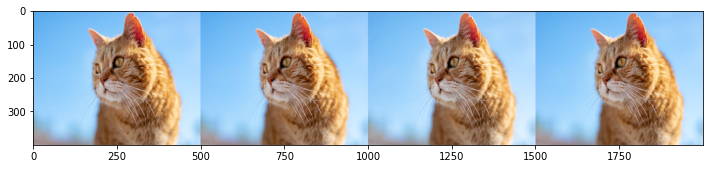

In [28]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

`iaa.Sequntial()`과 `iaa.OneOf()`, `iaa.Sometimes()` 등 각종 augmentation 기법을 활용하면 매우 다양한 조합을 만들어 낼 수 있다.  

개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어보자. 이때 조합될 수 있는 가짓수는 1024가지가 넘도록 한다. 시각화는 100장을 하도록 한다.

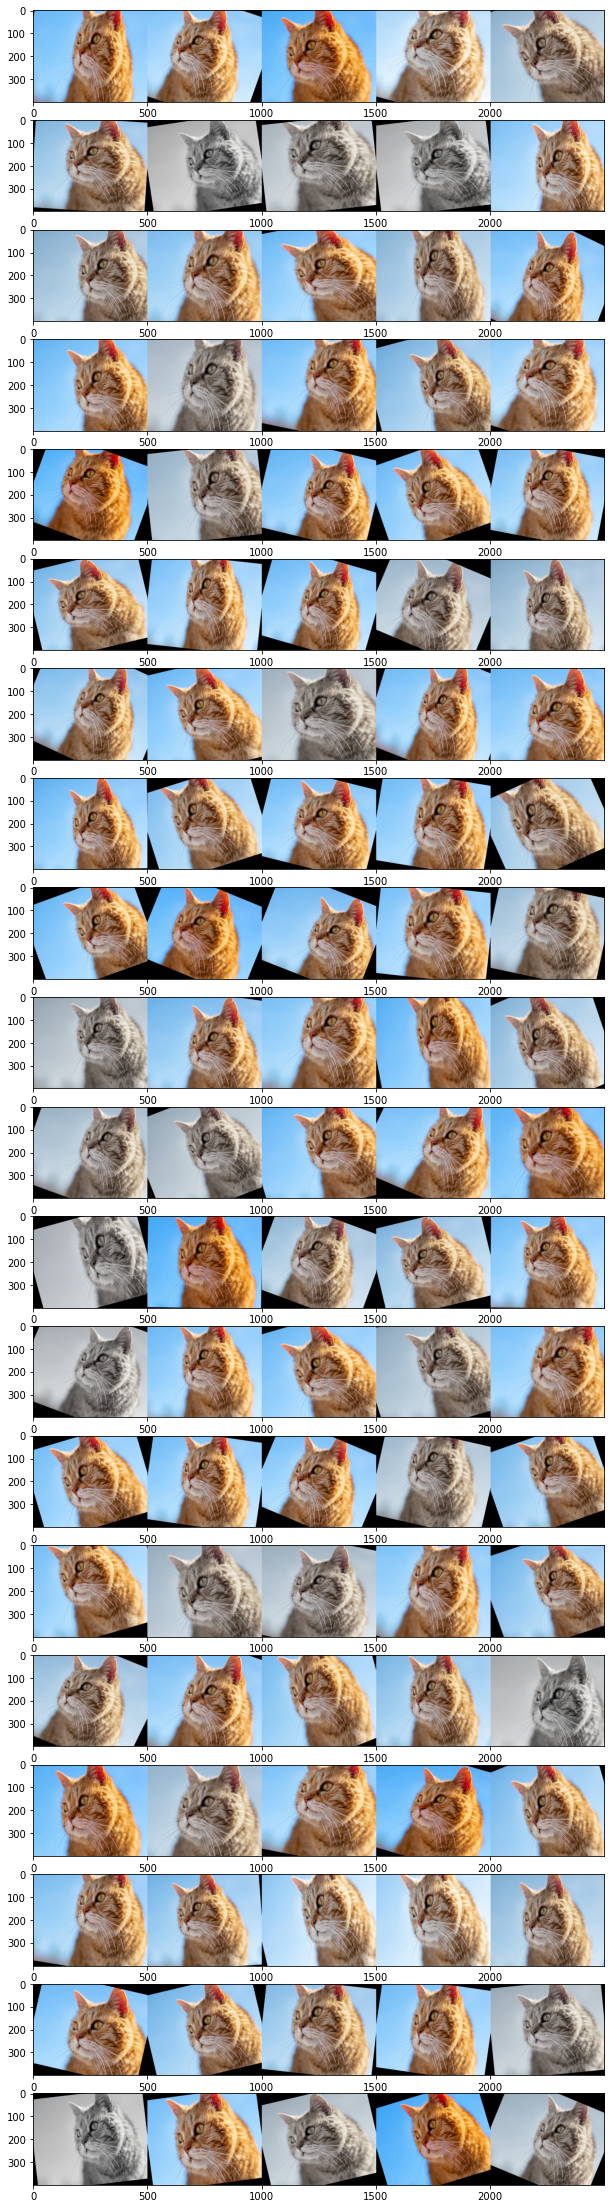

In [29]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()